In [1]:
HOME = "/home/localssk23/BraTS2025"

### Unzipping

In [2]:
# Unzip the data
# ? Time: 2 mins 35s.
# !unzip {HOME}/MICCAI-LH-BraTS2025-MET-Challenge-TrainingData.zip -d {HOME}/BraTS2025_TrainingData

Archive:  /home/localssk23/BraTS2025/MICCAI-LH-BraTS2025-MET-Challenge-TrainingData.zip
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00813-000/BraTS-MET-00813-000-seg.nii.gz  
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00813-000/BraTS-MET-00813-000-t1n.nii.gz  
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00813-000/BraTS-MET-00813-000-t2w.nii.gz  
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00813-000/BraTS-MET-00813-000-t1c.nii.gz  
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00813-000/BraTS-MET-00813-000-t2f.nii.gz  
  inflating: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-0

### Num files sanity check

In [10]:
main_data_dir = f"{HOME}/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/"
print(f"Data directory: {main_data_dir}")

Data directory: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/


In [17]:
%%sh

./sanity_file_num_check.sh 

Using overarching directory: /home/localssk23/BraTS2025
Number of folders in (excluding 'UCSD - Training'): 650
Total cases officially: 1296
Total UCSD cases officially: 646
So we HAVE all the cases: 1296 - 650 = 646


### Checking number of classes in each

BraTS-MET-00813-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00814-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00815-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00816-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00817-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00818-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00819-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00820-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00821-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00822-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00708-001: Unique values in 'seg.nii.gz' are: [0. 2. 3.]
BraTS-MET-00709-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00709-001: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00710-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-00711-000: Un

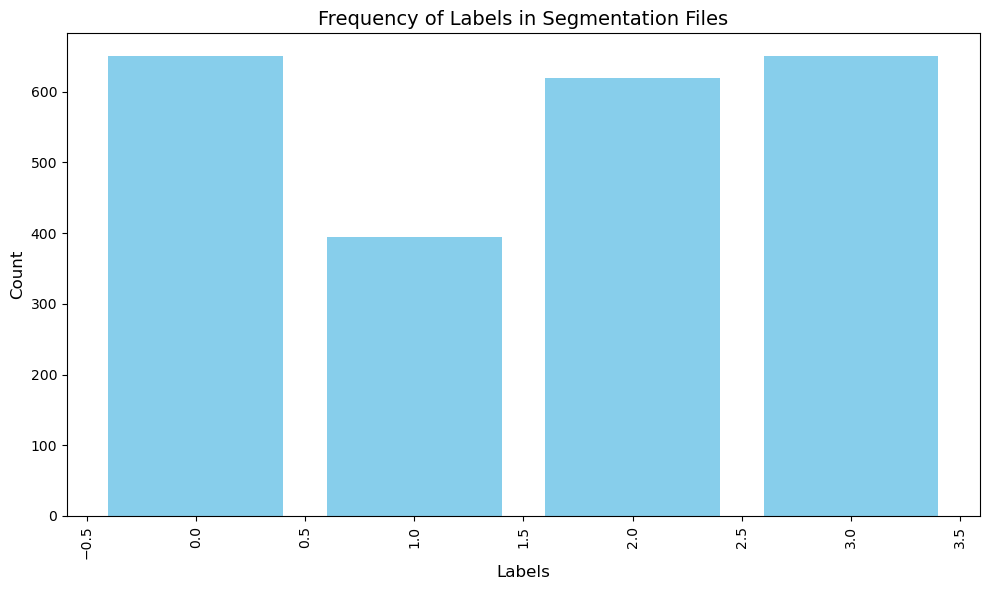

In [22]:
#? Time: 3m 50s

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Path to the data directory
data_dir = os.path.join(HOME, 'BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training')

# Initialize a Counter to tally the labels
label_counter = Counter()

# Iterate over each folder, excluding 'UCSD - Training'
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    
    # Skip the 'UCSD - Training' folder
    if folder_name == "UCSD - Training" or not os.path.isdir(folder_path):
        continue

    # Try to match the 'seg.nii.gz' file in the folder
    seg_file = None
    for file in os.listdir(folder_path):
        if file.endswith('seg.nii.gz'):
            seg_file = os.path.join(folder_path, file)
            break

    # Check if the 'seg.nii.gz' file exists in the folder
    if seg_file:
        # Load the segmentation file using nibabel
        seg_img = nib.load(seg_file)

        # Convert to a numpy array and find the unique values
        seg_data = seg_img.get_fdata()
        unique_values = np.unique(seg_data)

        # Update the label counter with the unique values
        label_counter.update(unique_values)

        print(f"{folder_name}: Unique values in 'seg.nii.gz' are: {unique_values}")
    else:
        print(f"❌ {folder_name}: 'seg.nii.gz' is missing.")

# Plotting the results
labels, counts = zip(*label_counter.items())  # Unzip the Counter into two lists

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Labels in Segmentation Files', fontsize=14)
plt.xticks(rotation=90)  # Rotate labels on x-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()

### VIZ

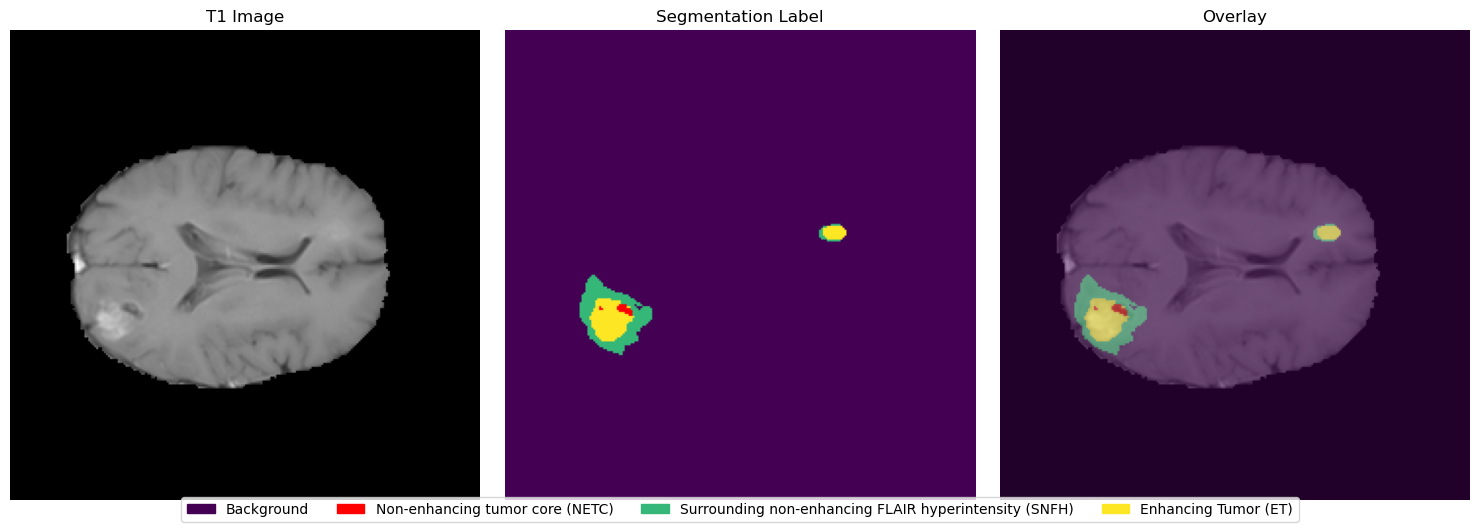

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

case = '00002'
label = f'/home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-{case}-000/BraTS-MET-{case}-000-seg.nii.gz'
t1c = f'/home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-{case}-000/BraTS-MET-{case}-000-t1c.nii.gz'
slice = 80
label_data = nib.load(label).get_fdata()
t1_data = nib.load(t1c).get_fdata()

# Legend
legend = {
    0: 'Background',
    1: 'Non-enhancing tumor core (NETC)',
    2: 'Surrounding non-enhancing FLAIR hyperintensity (SNFH)',
    3: 'Enhancing Tumor (ET)'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(t1_data[:, :, slice], cmap='gray')
ax[0].set_title('T1 Image')
ax[0].axis('off')

# Create custom color map for segmentation label
seg_label_color = np.zeros((label_data.shape[0], label_data.shape[1], 4))
for i in range(4):
    if i == 1:
        color = [1, 0, 0, 1]  # Red for NETC
    else:
        color = cm.viridis(i / 3)
    seg_label_color[label_data[:, :, slice] == i] = color

ax[1].imshow(seg_label_color)
ax[1].set_title('Segmentation Label')
ax[1].axis('off')

# Overlay
ax[2].imshow(t1_data[:, :, slice], cmap='gray')
ax[2].imshow(seg_label_color, alpha=0.5)
ax[2].set_title('Overlay')
ax[2].axis('off')

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=cm.viridis(i/3)) for i in range(4)]
handles[1] = plt.Rectangle((0,0),1,1, color='red')  # Set NETC to red
fig.legend(handles, legend.values(), loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout()
plt.show()


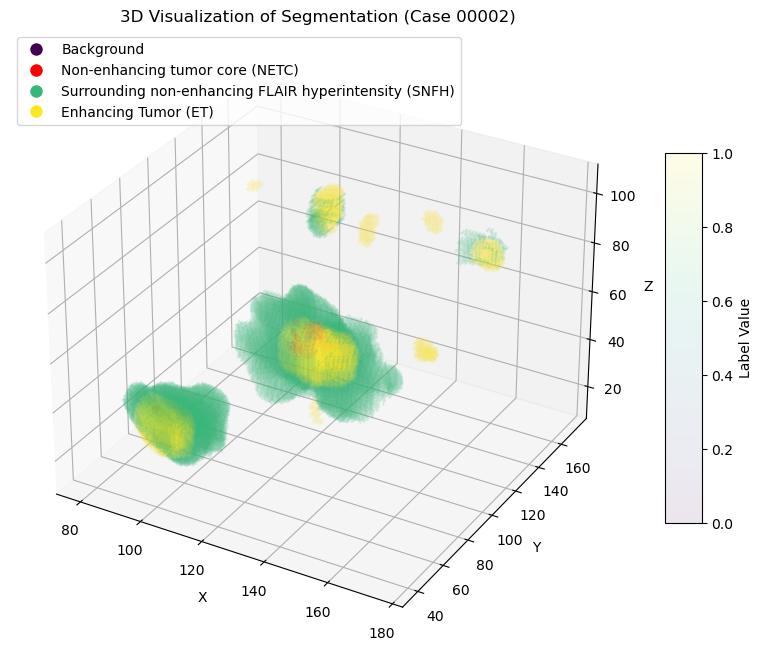

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Load the volume data
case = '00002'
volume = f'/home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-{case}-000/BraTS-MET-{case}-000-seg.nii.gz'
volume_data = nib.load(volume).get_fdata()

# Prepare data for 3D scatter plot
x, y, z = np.where(volume_data > 0)  # Non-zero values in the segmentation volume
labels = volume_data[x, y, z]  # The label values at the non-zero positions

# Create a custom color array for coloring points
colors = cm.viridis(labels / 3)  # Default colormap for all labels

# Manually adjust the color of Non-enhancing tumor core (label 1) to red
colors[labels == 1] = [1, 0, 0, 1]  # RGB for red with full opacity

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with customized colors
scatter = ax.scatter(x, y, z, c=colors, marker='o', alpha=0.1, s=1)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a colorbar to show the label values
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Label Value')

# Title for better understanding
ax.set_title(f"3D Visualization of Segmentation (Case {case})")

# Create legend handles using Line2D
legend_handles = []
for label, name in legend.items():
    if label == 1:
        # Manually set color for NETC to red
        color = [1, 0, 0, 1]  # Red
    else:
        color = cm.viridis(label / 3)  # Map other labels to the colormap
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name)
    legend_handles.append(handle)

# Add the legend
ax.legend(handles=legend_handles, loc='upper left', fontsize=10)

# Show the plot
plt.show()